# CS492 Assignment #1: Bias Mitigation Project (DUE 11:59pm on 3/30 (Tue))

## What is this?

This jupyter notebook describes the overall process of the assignment, including (1) detailed explanations about the motivation scenario along with codes and (2) skeleton codes that you are required to fill in. Two deliverables need to be submitted: this jupyter notebook and the discussion. You do not need to explicitly submit this jupyter notebook as our server keeps track of it. Make sure you submit the discussion in pdf form on KLMS.

In this assignment, students are required to implement the following three functions. We are going to provide a specific algorithm for you to implement so that the task is not open-ended and concrete enough. Specific precondition and postcondition of the functions are going to be explained later.

* `getBiasScore(predictionResultTable)` : Given a prediction result, which describes whether tweets are abusive depending on tweets' dialects, returns a numerical score representing the bias. 

* `undersampleData(trainingData, dialectClassifier, majorAbusiveLabel, majorDialectClass, ratio)` : Returns a dataset that undersampling has been performed. In other words, this function randomly selects `ratio` portion of samples of tweets (1) written in the dialect `majorDialectClass` and (2) assigned with the abusive class `majorAbusiveLabel` on the dataset `trainingData`. The tweets written in other dialect should remain as the original dataset.

* `rejectOptionBasedClassification(resultTable, theta, majorAbusiveLabel, majorDialectClass)` : returns a result of prediction in a way that the bias between groups are mitigated by reducing `majorAbusiveLabel` from `majorDialectClass` and incrasing `majorAbusiveLabel` (i.e. AAE) from the other dialect class (i.e. SAE). Conceptually, we are going to apply different thresholds for each dialect class.

Please note that the objective of this assignment is not to optimize the score of bias but to experiment your own ideas around data analysis and bias mitigation, although we explicitly ask you to implement functions for the sake of assignment. Therefore, It is completely okay to revise the existing codes, and even it is highly encouraged to try things out across multiple stages of machine learning pipeline to mitigate bias. Please explore as much as you can, and write the exploration on the discussion.

Also, the dataset and overall process of this assignment has been borrowed from a set of references and tuned to present more evident results on educational purpose. Although we are dealing with the real data and existing techniques, results in this assignment do not represent the real world: we cannot directly generalize our observations in this assignment. Please focus on methodological aspects of dealing with bias. You may want to discuss limitations of the overall process of this assignment as well.

### References

\[1\] Davidson, Thomas, Debasmita Bhattacharya, and Ingmar Weber. "Racial bias in hate speech and abusive language detection datasets." arXiv preprint arXiv:1905.12516 (2019).

\[2\] Dixon, Lucas, et al. "Measuring and mitigating unintended bias in text classification." Proceedings of the 2018 AAAI/ACM Conference on AI, Ethics, and Society. 2018.

\[3\] Sap, Maarten, et al. "The risk of racial bias in hate speech detection." Proceedings of the 57th Annual Meeting of the Association for Computational Linguistics. 2019.

\[4\] Founta, Antigoni-Maria, et al. "Large scale crowdsourcing and characterization of twitter abusive behavior." arXiv preprint arXiv:1802.00393 (2018).

\[5\] Verma, Sahil, and Julia Rubin. "Fairness definitions explained." 2018 IEEE/ACM International Workshop on Software Fairness (FairWare). IEEE, 2018.

\[6\] Pessach, Dana, and Erez Shmueli. "Algorithmic fairness." arXiv preprint arXiv:2001.09784 (2020).

\[7\] Kamiran, Faisal, Asim Karim, and Xiangliang Zhang. "Decision theory for discrimination-aware classification." 2012 IEEE 12th International Conference on Data Mining. IEEE, 2012.

## Overall procedure of the assignment

The objective of this assignment is (1) figuring out that the model's prediction is biased with respect to dialects of tweets and (2) mitigating such bias. To accomplish the objective, we are going to follow the procedure below.

    1. Import dataset for training
    
        1-1. Sample the data -------------------------------------------------- *Task 2*
    
    2. Preprocess the dataset
    
    3. Train a model             
    
    4. Evaluate the model
    
    5. Check whether the model is biased with respect to dialects
    
        5-1. Import dataset for testing
        
        5-2. Preprocess the tweet and perform prediction with the model
        
        5-3. Post process the prediction result for mitigating bias  ---------- *Task 3*
        
        5-4. Measure the score of bias ---------------------------------------- *Task 1*
    
    6. Investigate why such bias happens

        6-1. Decompose the original dataset into AAE and SAE groups
        
    7. Mitigate the bias
    
        7-1. Undersampling
        
        7-2. Reject Option based Classification

You can see that the tasks are not positioned in order (i.e. Task 2 is in the early stage, but Task 1 should be performed first). This is due to the flow of our scenario: (1) we first train the model, (2) measure the bias, and (3) mitigate the bias by implementing techniques within the machine learning pipeline, which is pre-processing and post-processing.

Therefore, here is the way you navigate this activity.

    1. Go over the sections from "1. Import dataset for training" to "5.4. Measure the score of bias". Ignore the section 1-1 and 5-3 at this point.
    
    2. Perform the *Task 1*.
    
    3. Proceed to 7-1. 
    
    4. Go back to the section 1-1 to perform the *Task 2* 
    
    5. Now you just played with the data, so we need to execute the machine learning pipeline again. Run every codes from the section 2. to section 7-2. 
    
    6. Go back to the section 5-3 to perform the *Task 3*
    
    7. Now you just played with the prediction result, so execute the ML pipeline again. Run every codes from the section 5-4 until the end.
    
    8. Now you're done!
    
    9. (Optional) Explore more!
    
        9-1. Try another dataset called "hatespeech" and see how results look like.
        
        9-2. Implement other techniques about measuring/mitigating bias.


## 1. Import dataset for training

We first import the dataset to train a model. We provide two datasets for training in total, but your tasks in this assignment are going to focus on a single dataset named `david.csv`. In other words, you don't need to perform measuring/mitigating bias on the other dataset, although the same techniques can be applied. 

We are going to first read `david.csv` file. You can browse [the original raw data](http://13.209.64.149:3000/bias-awareness-platform/david.csv). Then we format the data to feed it to the model training stage. Here, the data formatting means that we change the column name so that the label column name become "label", and tweet column name should be "tweet". We are not going to use other columns.

Please note that we encapsulated the data processing part (and other upcoming machine learning part as well) into `process.py` as it is not the most important part that you need to understand for this assignment. Please go to `process.py` if you are interested in. It is highly encouraged to understand the code of machine learning pipeline as well and even experiment various pipeline!

In [1]:
import process

datasetInfo = {
    'filename': 'http://172.10.6.40:3000/bias-awareness-platform/david.csv',                         # The filename
    'label': ['Hateful', 'Offensive', 'Neither']     # Labels (0: Hateful, 1: Offensive, 2: Neither)
}

################################################################
# We also have the following dataset. Please use these datasets for your exploration.

#datasetInfo = {
#    'filename': 'http://172.10.6.40:3000/bias-awareness-platform/hatespeech.csv',      
#    'label': ['Normal', 'Hateful']     
#}

###############################################################


data = process.dataImporting(datasetInfo['filename'])    # read the dataset.
                                                         # process.py is also included in the root directory
    
formattedData = process.dataFormatting(data, datasetInfo)     # format the dataset
    
formattedData

,label,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


## 1-1. Sample the data (Task 2)

\*\*\* **Please proceed until step 5-4 if you haven't. Then come back to this step. You can simply skip this section to understand the overall procedure first** \*\*\*

To reduce the bias, we are going to sample only a part of "Offensive" tweets written in AAE. Please complete the following function `undersampleData`. Here is the precondition and postcondition of the function.

<i>Precondition</i>

    * trainingData : the dataset for training
    
    * dialectClassifier : A classifier that produces probabilities of dialects. Please 
                          refer to the section 6-1 for more detailed usage. 
                          You can borrow some of the codes in the section 6-1.
                          
    * majorAbusiveLabel : the abusive label that needs to be undersampled.
                          In our example, it is 1 (Offensive)
                          
    * majorDialectClass : the dialect class that needs to be undersampled.
                          In our example, it is 0 (AAE)
                          
    * ratio : the portion of samples that need to be captured. In our example,
                          it is 0.3, meaning we collect only 30% of the samples 
                          in the group.
                          
<i> Postcondition </i>

    * undersampledData : the dataset after the undersampling. Please make sure that you only need to have 
                         columns "label" and "tweet", same as the table in the previous cell (i.e. section 1)

In [2]:
import twitteraae.code.dialectPrediction as dialectPrediction
import pandas as pd

def undersampleData(trainingData, dialectClassifier, majorAbusiveLabel, majorDialectClass, ratio) :
    returnValue = trainingData
    
    return returnValue

undersampledData = undersampleData(formattedData, dialectPrediction, 1, 'AAE', 0.3)

undersampledData

,label,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


## 2. Preprocess the dataset

The datasets need preprocessing to train a model. The methods of preprocessing can be creative and it depends on the model we choose and the objective we have. 

This assignment is going to use [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression#:~:text=Logistic%20regression%20is%20a%20statistical,a%20form%20of%20binary%20regression).) model. To use the model, we are going to vectorize the tweet text (i.e. a text is converted into a set of numerical values, say features) so that a Logistic Regression model can be trained. To vectorize text, we are going to use [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#:~:text=In%20information%20retrieval%2C%20tf%E2%80%93idf,in%20a%20collection%20or%20corpus.) with [n-grams](https://en.wikipedia.org/wiki/N-gram#:~:text=In%20the%20fields%20of%20computational,a%20text%20or%20speech%20corpus.) (1 $\leq$ n $\leq$ 3).

In [3]:
preprocessingResult = process.dataPreprocessing(undersampledData)

#  process.dataPreprocessing returns not only a matrix that our original dataset has been converted into,
#  but also vectorizers, which is a function that translates a tweet into a vector.

# Detailed codes describing how to exactly preprocess the data can be found in process.py

preprocessingResult['M']    # the matrix

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ubuntu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ubuntu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/home/ubuntu/anaconda3/envs/bias2/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 2., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [4]:
preprocessingResult['M'].shape

(24783, 11172)

## 3. Train a model

Using the matrix that consists of a set of vectors, we are going to train a Logistic Regression model. We first split the matrix into two: ($X_{training}$, $y_{training}$) and ($X_{testing}$, $y_{testing}$) to train and evaluate the model where $X$ refers to a set of features and $y$ refers to the target label. During the training, we tune the model parameter to achieve better performance. We used a random grid search with 5-fold cross validation.

In [5]:
modelResult = process.buildModel(preprocessingResult)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


## 4. Evaluate the model

Now we evaluate the model to measure the performance. The result shows the model performance (precision, recall, f1-score) and the confusion matrix.

              precision    recall  f1-score   support

           0       0.45      0.59      0.51       164
           1       0.96      0.91      0.94      1905
           2       0.83      0.94      0.88       410

    accuracy                           0.89      2479
   macro avg       0.75      0.81      0.78      2479
weighted avg       0.91      0.89      0.90      2479



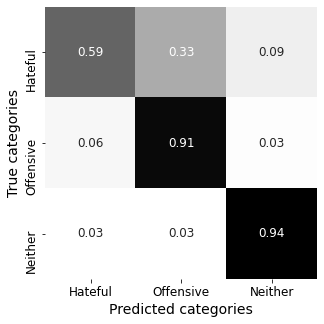

In [6]:
evaluationResult = process.evaluateModel(modelResult, datasetInfo['label'])

## 5. Check whether the model is biased with respect to dialects

Now we have a trained model, which can be used for moderating tweets. Let's check whether the model is biased with respect to dialects, African-American English and Standard American English. Here, the meaning of "our model is biased" means that __our model gives different distributions of prediction results with respect to the dialects__. For example, if our model tends to predict a large portion of tweets in AAE as abusive whereas a large portion of tweets in SAE as neither, then we can say our model is biased (assuming the data collection method of tweet does not have any bias between AAE and SAE). 

Now we're going to use the trained model to classify a new tweet dataset. The data contains a class that represents the dialect. Note that we do not have the ground truth label on the tweet's abusiveness, because we don't actually know the ground truth of a tweet which we are going to apply our model. Therefore, we cannot measure any model performance (i.e. precision, recall, f1-score) with this new dataset, but we can only check the bias.

Also, as we have two labels (AAE/SAE) and (Hateful/Offensive/Neither), we will consistently use the term __class__ for referring (AAE/SAE), and __label__ for referring (Hateful/Offensive/Neither).

### 5-1. Import dataset for testing

In [7]:
import pandas as pd

filepath='http://172.10.6.40:3000/bias-awareness-platform/testTweet.csv'
testTweet = pd.read_csv(filepath)      # class 0: AAE,  class 1: SSE

testTweet

,tweet,class
0,no Goodmorning text !!,0
1,Waffle House bout to grub \ud83d\ude0b\ud83d\u...,0
2,@motionlessinwim Damn straight.,0
3,Can't trust these bitches \ud83d\ude45,0
4,I still can't get over #oomf Avi's \ud83d\ude0d,0
...,...,...
1995,@Rello_Lee everybody that watched that game Wi...,1
1996,The power of the STACHE!,1
1997,It's crazy to think that you were someone's mi...,1
1998,I feel so much better about life when my hair ...,1


### 5-2. Preprocess the tweet and perform prediction with the model

We need to vectorize all the tweets and make prediction with the trained model. The columns (0, 1, 2) means the probablity that the model produced for each label (Hateful, Offensive, Neither).



In [8]:
vectorizer = preprocessingResult['vectorizer']
model = modelResult['model']

Mt = process.vectorize(vectorizer, testTweet['tweet'])

predictionResult = model.predict(Mt)
predictionProbability = model.predict_proba(Mt)

resultTable = pd.concat([testTweet, 
                         
                         pd.DataFrame(predictionResult, columns=['predLabel']), 
                         
                         pd.DataFrame({ x: [predictionProbability[i][x] for i in range(len(predictionProbability)) ] for x in range(len(predictionProbability[0])) })], 
                        
                        axis=1)

resultTable

,tweet,class,predLabel,0,1,2
0,no Goodmorning text !!,0,2,0.091434,0.224476,0.684090
1,Waffle House bout to grub \ud83d\ude0b\ud83d\u...,0,2,0.045443,0.195467,0.759090
2,@motionlessinwim Damn straight.,0,1,0.099446,0.463796,0.436759
3,Can't trust these bitches \ud83d\ude45,0,1,0.064635,0.931839,0.003525
4,I still can't get over #oomf Avi's \ud83d\ude0d,0,2,0.068087,0.182609,0.749304
...,...,...,...,...,...,...
1995,@Rello_Lee everybody that watched that game Wi...,1,2,0.050610,0.124059,0.825330
1996,The power of the STACHE!,1,2,0.075631,0.218860,0.705508
1997,It's crazy to think that you were someone's mi...,1,2,0.008189,0.212898,0.778912
1998,I feel so much better about life when my hair ...,1,2,0.073520,0.111543,0.814937


### 5-3. Post process the prediction result (Task 3)

We can further process the result of prediction. This task is about processing the prediction results in a way that it mitigates the bias between AAE and SAE classes.

\*\*\* **Please proceed until step 7-2 if you haven't. Then come back to this step. You can simply skip this section to understand the overall procedure** \*\*\*

Your task is to implement the bias mitigation technique called Reject Option based Classification. Given $\theta$=0.6, overwrites the assignment if the prediction result is under the critical region. The detailed explanation of this technique is written in the section 7-2. Here is the precondition and post condition of the function

<i> Precondition </i>

    * resultTable : the table that contains both dataset and its prediction results
    
    * theta : the parameter for Reject Option based Classification method
    
    * majorAbusiveLabel : the label that needs to be mitigated
    
    * majorDialectClass : the class that needs to have reduced number of majorAbusiveLabel
    
<i> Postcondition </i>

    * processedResultTable : the table that contains mitigated prediction results
    

In [9]:
def rejectOptionBasedClassification(resultTable, theta, majorAbusiveLabel, majorDialectClass) :
    returnValue = resultTable
    
    return returnValue

processedResultTable = rejectOptionBasedClassification(resultTable, 0.6, 1, 0) # 1: 'Offensive', 0: 'AAE'

processedResultTable

,tweet,class,predLabel,0,1,2
0,no Goodmorning text !!,0,2,0.091434,0.224476,0.684090
1,Waffle House bout to grub \ud83d\ude0b\ud83d\u...,0,2,0.045443,0.195467,0.759090
2,@motionlessinwim Damn straight.,0,1,0.099446,0.463796,0.436759
3,Can't trust these bitches \ud83d\ude45,0,1,0.064635,0.931839,0.003525
4,I still can't get over #oomf Avi's \ud83d\ude0d,0,2,0.068087,0.182609,0.749304
...,...,...,...,...,...,...
1995,@Rello_Lee everybody that watched that game Wi...,1,2,0.050610,0.124059,0.825330
1996,The power of the STACHE!,1,2,0.075631,0.218860,0.705508
1997,It's crazy to think that you were someone's mi...,1,2,0.008189,0.212898,0.778912
1998,I feel so much better about life when my hair ...,1,2,0.073520,0.111543,0.814937


### 5-4. Measure the score of bias (Task 1)

Given the column `class` (that represents the tweet is written in AAE or SAE) and the column `predLabel` (that represents whether the tweet is abusive), we can measure whether model's prediction is biased. There can be multiple ways to compute such bias, and each measure might captures different perspectives on the bias. 

One of the simple measures of bias is to compare the ratio of predicted labels. In other words, we can compute the percentage of occupation of each predicted label between AAE class and SAE class, and compare the percentage. For example, let's say our model predicted 1000 AAE tweets and 350 of them were predicted as 'offensive'. The the 'offensive' label account for 35% of the entire prediction (let's say $P(t = 1|AAE) = 0.35$). We do the same calculation for SAE tweets, and we got 120 'offensive' tweets (let's say $P(t = 1|SAE) = 0.12$). In this case, we can say the model is likely to predict AAE tweets (2 times) more offensive than SAE tweets. Let's see how it goes for our dataset.

Your task is to implement the following function `getBiasScore` that computes the difference between the percentage of occupation for all the labels. i.e. <font size="3"> ${ P(t=l_i|AAE) } - {P(t=l_i|SAE)}$ </font> where $t$ refers to tweets and $l_i$ refers to a label representing abusiveness. Then we can get a value for each label. Here is the precondition and postcondition of the function.

<i> Precondition </i>

    * predictionResultTable : a table that contains both dataset and its prediction results

<i> Postcondition </i>

    * biasScore : a table that describes the difference between percentage of occupation for 
                  labels on all classes
                  
Please refer to the format of the return value (i.e. `biasScore`) below.


       label  p_AAE  p_SAE  diff
0    Hateful    0.1    0.2   0.5
1  Offensive    0.1    0.2   0.5
2    Neither    0.1    0.2   0.5


<AxesSubplot:xlabel='label'>

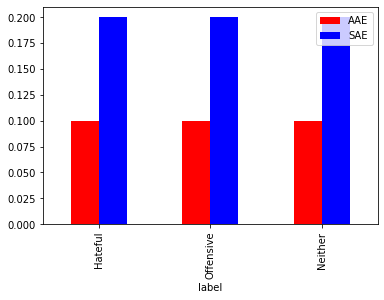

In [10]:
def getBiasScore(predictionResultTable) :
    returnValue = pd.DataFrame([ [x, 0.1, 0.2, 0.5] for x in datasetInfo['label'] ], columns=['label', 'p_AAE', 'p_SAE', 'diff'])

    return returnValue

biasScore = getBiasScore(processedResultTable)

print(biasScore)

# Please refer to the structure of the table shown below. You must meet the structure. 
# Here, p_SAE means the proportion of tweets written in SAE with a label L. 
# The sum of (p_SAE_Hateful, p_SAE_Offensive, p_SAE_Neither) should be 1. Same for p_AAE.
# The difference means p_AAE - p_SAE

# The following code is to plot a bar graph that shows the result more effectively.

AAE_statistics = processedResultTable.loc[processedResultTable['class'] == 0]['predLabel'].value_counts()
SAE_statistics = processedResultTable.loc[processedResultTable['class'] == 1]['predLabel'].value_counts()

df = pd.DataFrame([ [datasetInfo['label'][x], biasScore['p_AAE'][x], biasScore['p_SAE'][x]] for x in range(len(datasetInfo['label'])) ], 
                  
                  columns=['label', 'AAE', 'SAE'])

df.plot(kind='bar', x='label', color=['red', 'blue'], width=0.5, position=0.5)

We computed the bias scores and compared the difference. In this way, we can measure whether model produces a bias with respect to labels. Of course, there can be various different ways to compute the bias. [This research](https://fairware.cs.umass.edu/papers/Verma.pdf) summarized possible ways of measuring bias. Each measure would capture different perspective of bias, so it would be important to properly choose the measurement. Also, we can be creative to define such measure. After finishing the assignment, it is highly encouraged to explore different measures, see how it goes, and think about pros and cons of each measurement.

Now, you can figure out that our trained model actually predicts tweets written AAE more hateful and offensive than that of SAE. Then our next question should be the following :

* Why does our model have such bias even our training data doesn't have any columns on dialects (i.e. whether the tweet is AAE or SAE)?
* How to mitigate such bias?

We are going to answer these questions.

Before going to the next step, please write down the result (i.e. the table) below, as a memo. Later, we are going to compare this with the result of mitigation.

###################################################################

         Paste your result here (before bias mitigation) 

###################################################################

    




## 6. Investigate why such bias happens

You can see that our model predicted AAE tweets to be more "Offensive" compared to "Hateful", compared to SAE. One of the potential reasons might be that our training dataset is biased. In other words, it could be possible that the training data contains much more AAE tweets with 'offensive' label compared to other labels ('hateful', 'neither').

To see if that's the case, we are going to go back to the training dataset and decompose the dataset into two groups: group of AAE tweets and group of SAE groups. Then we are going to plot the label distribution again.

As we had no ground truth around whether tweets are written in AAE and SAE on the training dataset, we are going to use a classifier that predicts such dialect. The details are written in [this paper](https://arxiv.org/pdf/1608.08868.pdf), and we are going to use the existing code, `dialectPrediction.py`, from [the author's repository](https://github.com/slanglab/twitteraae)

`dialectPrediction.predict(str.split())` returns four values each of which refers to a probability of being written in a dialect, which are African-American, Hispanic, Asian, and White, respectively. We are going to classify a tweet as AAE if the probability of being AA is greater than or equal to $0.5$. Simiarly, we classify a tweet as SAE if that of being White is greater than or equal to $0.5$. Please note that a similar approach of predicting dialects has been taken by [this research](https://arxiv.org/pdf/1905.12516.pdf).

The following is an example of performing dialect prediction.

In [11]:
import twitteraae.code.dialectPrediction as dialectPrediction

dialectPrediction.load_model()
pred = dialectPrediction.predict(u"hello there".split())

pred
# if pred[0] >= 0.5, then we classify the tweet as AAE
# if pred[3] >= 0.5, then we classify the tweet as SAE
# if none of the above, we don't use such tweet.

array([0.16603718, 0.27450171, 0.22886004, 0.33060107])

### 6-1. Decompose the original dataset into AAE and SAE groups

In this step, we are going to group the original training dataset, which we have used to train a model, into AAE, SAE, and Unknown groups using `dialectPrediction`. We are going to add a new column called `dialect` which consists of AAE, SAE, and Unknown.

In [12]:

originalDataset = formattedData    # the original data without undersampling

def determineDialect(tweet) :
    # returns a label of the dialect prediction
    
    pred = dialectPrediction.predict(tweet.split())
    
    if pred is None :
        return 'Unknown'
    
    
    if pred[0] >= 0.5 :
        return 'AAE'
    elif pred[3] >= 0.5 :
        return 'SAE'
    else:
        return 'Unknown'
    
datasetWithGroups = pd.concat([originalDataset, 
                               
                               pd.DataFrame([ determineDialect(t) for t in formattedData['tweet'] ], columns=['dialect']
                               
                               )
                              ], axis=1)

datasetWithGroups

,label,tweet,dialect
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,Unknown
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,AAE
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Unknown
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Unknown
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,AAE
...,...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,AAE
24779,2,"you've gone and broke the wrong heart baby, an...",SAE
24780,1,young buck wanna eat!!.. dat nigguh like I ain...,AAE
24781,1,youu got wild bitches tellin you lies,AAE


Now let's see how the distribution of `label`, a label of abusive language, with respect to `dialect`.

In [13]:
datasetWithGroups['label'].value_counts()

1    19190
2     4163
0     1430
Name: label, dtype: int64

Total number of SAE tweets: 3534
Total number of AAE tweets: 8099
The ratio between the number of samples: 2.2917374080362194


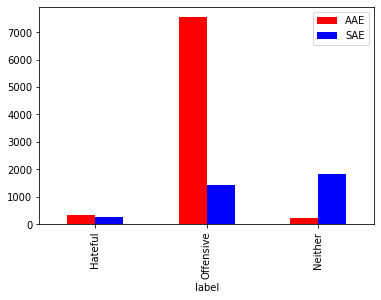

In [14]:
SAE_dist = datasetWithGroups.loc[datasetWithGroups['dialect'] == 'SAE']['label'].value_counts()
AAE_dist = datasetWithGroups.loc[datasetWithGroups['dialect'] == 'AAE']['label'].value_counts()

df = pd.DataFrame([ [datasetInfo['label'][x], AAE_dist[x], SAE_dist[x]] for x in range(len(datasetInfo['label'])) ], 
                  
                  columns=['label', 'AAE', 'SAE'])

df.plot(kind='bar', x='label', color=['red', 'blue'], width=0.5, position=0.5)

print("Total number of SAE tweets: {}".format(sum(SAE_dist)))
print("Total number of AAE tweets: {}".format(sum(AAE_dist)))

print("The ratio between the number of samples: {}".format((sum(AAE_dist)/sum(SAE_dist))))

Above graph shows that (1) the distribution of tweets in the training data is highly skewed to the 'Offensive' label for AAE group and (2) the number of samples of AAE tweets (8099) are 2.3x greater than that of SAE tweets(3534). It motivates us to [undersample](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis#Undersampling_techniques_for_classification_problems) the AAE tweets with 'Offensive' labels. The portion of undersampling can be varied, but we are going to sample only 50% of AAE tweets with 'Offensive' label.

## 7. Mitigate the bias

With such observation, we are going to mitigate the bias (i.e. we are going to reduce the bias score that we have computed by `getBiasScore` with respect to "Offensive" label.

### 7-1. Undersampling

Now, **please go to the step 1-1 to implement the undersampling. After implementing the undersampling, make sure you execute all the process so far again. Then go to the next step.** The next step computes the same distribution as above, but with undersampled dataset.


Total number of SAE tweets: 3534
Total number of AAE tweets: 8099
The ratio between the number of samples: 2.2917374080362194


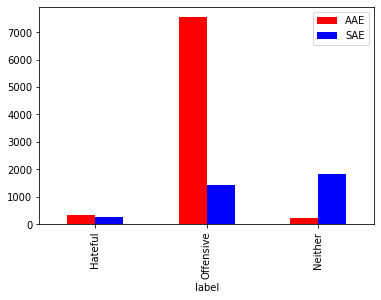

In [15]:
originalDataset = undersampledData

datasetWithGroups = pd.concat([originalDataset, 
                               
                               pd.DataFrame([ determineDialect(t) for t in formattedData['tweet'] ], columns=['dialect']
                               
                               )
                              ], axis=1)

SAE_dist = datasetWithGroups.loc[datasetWithGroups['dialect'] == 'SAE']['label'].value_counts()
AAE_dist = datasetWithGroups.loc[datasetWithGroups['dialect'] == 'AAE']['label'].value_counts()

df = pd.DataFrame([ [datasetInfo['label'][x], AAE_dist[x], SAE_dist[x]] for x in range(len(datasetInfo['label'])) ], 
                  
                  columns=['label', 'AAE', 'SAE'])

df.plot(kind='bar', x='label', color=['red', 'blue'], width=0.5, position=0.5)

print("Total number of SAE tweets: {}".format(sum(SAE_dist)))
print("Total number of AAE tweets: {}".format(sum(AAE_dist)))

print("The ratio between the number of samples: {}".format((sum(AAE_dist)/sum(SAE_dist))))

We can see that (1) the distribution of AAE tweets becomes less skewed to 'Offensive' label comapred to original dataset and (2) the ratio between the number of AAE tweets and SAE tweets has been reduced. The following is the measure of bias with the undersampled dataset: 

       label  p_AAE  p_SAE  diff
0    Hateful    0.1    0.2   0.5
1  Offensive    0.1    0.2   0.5
2    Neither    0.1    0.2   0.5


<AxesSubplot:xlabel='label'>

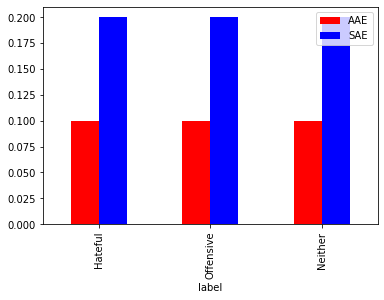

In [16]:
### the same code with above

biasScore = getBiasScore(resultTable)

print(biasScore)

# Please refer to the structure of the table shown below. You must meet the structure. 
# Here, p_SAE means the proportion of tweets written in SAE with a label L. 
# The sum of (p_SAE_Hateful, p_SAE_Offensive, p_SAE_Neither) should be 1. Same for p_AAE.
# The difference means p_AAE - p_SAE

# The following code is to plot a bar graph that shows the result more effectively.

AAE_statistics = processedResultTable.loc[resultTable['class'] == 0]['predLabel'].value_counts()
SAE_statistics = processedResultTable.loc[resultTable['class'] == 1]['predLabel'].value_counts()

df = pd.DataFrame([ [datasetInfo['label'][x], biasScore['p_AAE'][x], biasScore['p_SAE'][x]] for x in range(len(datasetInfo['label'])) ], 
                  
                  columns=['label', 'AAE', 'SAE'])

df.plot(kind='bar', x='label', color=['red', 'blue'], width=0.5, position=0.5)

You can see that the difference of "Offensive" label has been reduced (originally it was 214, possibility different from your value). Therefore, we can say that our model yields less biased prediction with respect to the "Offensive" label. However, you can observe that the difference of "Hateful" label has been increased (originally it was 67, possibly different from your value). You may want to discuss this observation in the discussion.

###################################################################

         Paste your result here (after undersampling) 

###################################################################
    
    
    
    
    
    
    
    
    
    
    

### 7-2. Reject Option based Classification \[7\]

In this step, we are going to implement Reject Option based Classification \[7\], which is another technique of mitigating bias. This technique can be applied when model produces probabilities for prediction.

Let's say we trained a model, and use it to predict the abusive label of a tweet $t$. Then the model produces a probability for each label $l_i$, meaning the probability of being assigned to the label $l_i$ for the tweet $t$. Normally, we find the maximum probability across the labels and assign the label as a prediction result.

The insight of this bias mitigation technique is that even if we assign the label with the highest probability, it can be still uncertain. For example, let's say we have two labels $l_1$ and $l_2$, and our model produces probabilities $p_1$=0.55 and $p_2$=0.45 for a tweet $t$. Even if we can assign the label $l_1$ in this case, we can say the model is not really sure about the assignment because the probability (i.e. $p_1$) is relatively low.

The technique introduces $\theta$, a threshold to <i>defer</i> the label assignment. If $max(P(t=c_i), 1-P(t=c_i)) < \theta$ where $0.5 < \theta < 1$, we defer the assignment at the moment, meaning we do not always assign the label with the highest probability. We refer to such region as <i> critical region </i>. 

For all the deferred assignment, we assign a label in a way that it mitigates the bias. For example, in our case, if the model is not sure (i.e. the condition for deffering the decision has been satisfied) for an AAE tweet, we do not assign "Offensive" even the probability of being "Offensive" is the highest. In the case where "Offensive" is the highest, we simply assign the label with second highest probability. For the deffered assignment for a SAE tweet, we assign "Offensive" regardless of the probabilities. By having different assignment methods for different groups, we can reduce the bias.

The mathematical interpretation of the mitigation method is to give different costs when misprediction happens. For example, let's say our model predicted a label for an AAE tweet. If we have large $\theta$ in this case, it means we are highly likely to defer the assignment. In other words, we are going to give the "Offensive" label to the AAE tweet only when we are very certain. Therefore, we can interpret it in a way that the cost of misprediction becomes high especially for the case where the ground truth was not "Offensive" but our prediction is "Offensive". Note that it is relatively okay to mispredict an AAE tweet with the ground truth "Offensive" because we need to reduce the number of "Offensive" judges to mitigate bias. These two different misprediction have different costs. More detailed mathematical formulation can be found in the [paper](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=6413831&tag=1).

We are going to use $\theta=0.6$ in this assignment. You may want to experiment different values of $\theta$. Please go to the step 5-3. 

Now, let's compute the bias score again.

       label  p_AAE  p_SAE  diff
0    Hateful    0.1    0.2   0.5
1  Offensive    0.1    0.2   0.5
2    Neither    0.1    0.2   0.5


<AxesSubplot:xlabel='label'>

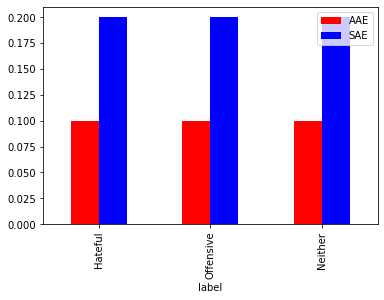

In [17]:
### the same code with above

biasScore = getBiasScore(processedResultTable)

print(biasScore)

# Please refer to the structure of the table shown below. You must meet the structure. 
# Here, p_SAE means the proportion of tweets written in SAE with a label L. 
# The sum of (p_SAE_Hateful, p_SAE_Offensive, p_SAE_Neither) should be 1. Same for p_AAE.
# The difference means p_AAE - p_SAE

# The following code is to plot a bar graph that shows the result more effectively.

AAE_statistics = processedResultTable.loc[processedResultTable['class'] == 0]['predLabel'].value_counts()
SAE_statistics = processedResultTable.loc[processedResultTable['class'] == 1]['predLabel'].value_counts()

df = pd.DataFrame([ [datasetInfo['label'][x], biasScore['p_AAE'][x], biasScore['p_SAE'][x]] for x in range(len(datasetInfo['label'])) ], 
                  
                  columns=['label', 'AAE', 'SAE'])

df.plot(kind='bar', x='label', color=['red', 'blue'], width=0.5, position=0.5)

You can see that the difference on "Offensive" label has been further reduced. However, the difference on "Hateful" label has been further increased.

If you think about the algorithm of Rejection Option based Classification, it always reduces a bias of a certain label, but it could generate more difference between other labels.

#########################################################################################

         Paste your result here (after Reject Option based Classification) 

#########################################################################################

    
    
    
    
    
    
    
    

This is the end of required assignments. The following is optional but highly encouraged, which could make your discussion much more strong.

    * Try out our second dataset. It contains two labels "Hateful", "Normal". You can apply same techniques for
      measuring and mitigating the bias.
      
    * Try out various methods for measuring bias. There are many ways to measure bias, and each measure could
      capture different perspectives of bias. For example, we calculated the difference between classes, but
      we can also compute ratio between classes. These two different measurement can be used in different situation
      as it could capture different perspective of bias. Experiment other measures as well, and discuss
      pros and cons of each.
      
    * Try out other techniques for bias mitigation. The technique can be something that has been already known,
      or you can invent your own algorithm. Also, such techniques can be applied throughout the machine learning
      pipeline. We have not discussed the bias that comes from ML model itself. It would be great to try out
      other machine learning models, see how each model gives any bias, and think about why.